https://drive.google.com/file/d/1Of5PPSoHc53ScYpItvqeyx1IpM06IYH5/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/Shobhit Singh/OneDrive/Desktop/room rent project/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 55.5 KB


In [5]:
df.shape

(545, 13)

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
X = ['area','bedrooms','bathrooms','stories','parking']

In [10]:
new_data = df[["price", "area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"]]

In [11]:
new_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0


Text(0, 0.5, 'Price')

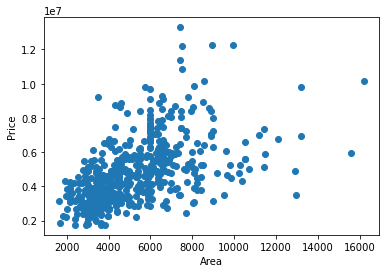

In [12]:
plt.scatter(df.area,df.price)
plt.xlabel('Area')
plt.ylabel('Price')

In [13]:
model = LinearRegression()

In [14]:
X = df[[ "area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"]]
Y = df.price

In [15]:
df.ndim

2

In [16]:
X.ndim

2

In [17]:
Y.ndim

1

In [18]:
Y


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [19]:
X


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [21]:
len(X_train)

490

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
model.intercept_

-455486.9646438528

In [24]:
model.coef_

array([2.33676869e+02, 1.53807114e+05, 9.52808476e+05, 4.56765594e+05,
       5.09881065e+05, 3.08710911e+05, 4.38666648e+05, 7.49592329e+05,
       7.93756849e+05, 3.49232931e+05, 5.67673272e+05, 4.66879083e+05])

In [25]:
Y_pred = model.predict(X_test)

In [26]:
r2_score(Y_test,Y_pred)

0.6044816576713701

In [27]:
model.predict([[2910,3,1,1,1,0,0,0,0,0,0,1]])

c:\Users\Shobhit Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3072268.28393536])

In [28]:
import pickle

In [29]:
with open('rent_model.pkl', 'wb') as files:
    pickle.dump(model,files)